# ML Project

## Houston Asher-Laws

https://github.com/hasherlaws18/datafun-07-ml


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Part 1 - Chart a Straight Line

We create a lambda for the preceding formula. We will store each Fahrenheit/Celsisus pair as a tuple in temps. After that we place the data in the DataFrame. Then we use it's plot method to display the linear relationship between the Fahrenheit and Celsius temperatures. 

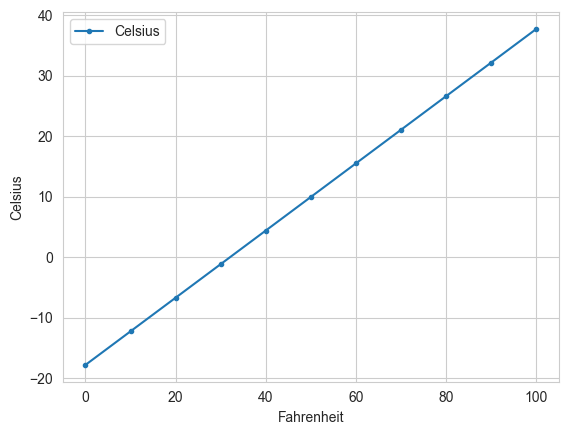

In [59]:
c = lambda f: 5 / 9 * (f-32)
temps = [(f, c(f)) for f in range(0, 101, 10)]
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x= 'Fahrenheit', y='Celsius', style = '.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediciton 

### Section 1 - Data Acquisiton 

In [60]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [61]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [62]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [63]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

In [64]:
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [65]:
nyc_df.Date.dtype

dtype('int64')

In [66]:
nyc_df.Date = nyc_df.Date.floordiv(100)

In [67]:
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

In [68]:
pd.set_option('display.precision', 2)

In [69]:
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [70]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)

In [71]:
linear_regression.slope


np.float64(0.014771361132966163)

In [72]:
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6 - Predict 

In [73]:
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

### Section 7 - Visulizations 

(10.0, 70.0)

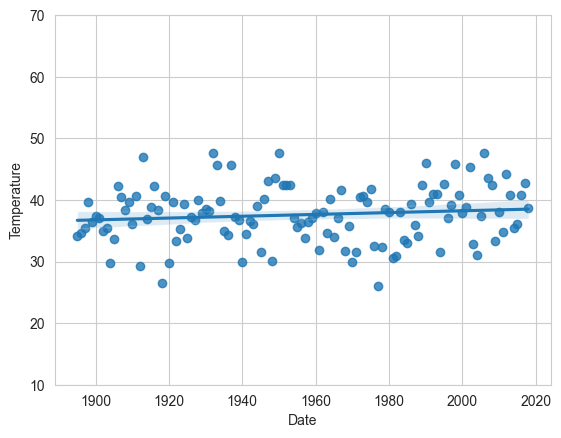

In [74]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10, 70)

## Part 3 - Prediction

### Section 1 - Build the Model

In [78]:
X_train, X_test, y_train, y_test = train_test_split(nyc_df.Date.values.reshape(-1,1), nyc_df.Temperature.values, random_state=11)

In [79]:
X_train.shape

(93, 1)

In [80]:
X_test.shape

(31, 1)

In [81]:
linear_regression = LinearRegression()

In [82]:
linear_regression.fit(X=X_train, y=y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [83]:
linear_regression.coef_

array([0.01939167])

In [84]:
linear_regression.intercept_

np.float64(-0.30779820252656975)

### Section 2 - Test the Model

In [86]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p: .2f}, exprected: {e:.2f}')

predicted:  37.86, exprected: 31.70
predicted:  38.69, exprected: 34.80
predicted:  37.00, exprected: 39.40
predicted:  37.25, exprected: 45.70
predicted:  38.05, exprected: 32.30
predicted:  37.64, exprected: 33.80
predicted:  36.94, exprected: 39.70


### Section 3 - Predict

In [88]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)
predict(2024)

array([38.94094855])

### Section 4 - Visualizations

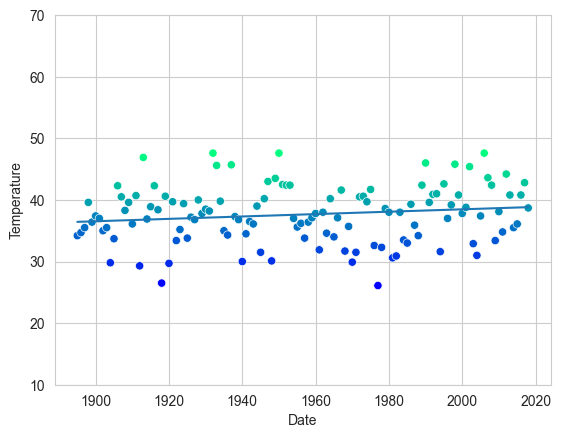

In [92]:
axes = sns.scatterplot(data = nyc_df, x='Date', y='Temperature', hue= 'Temperature', palette= 'winter', legend=False)
axes.set_ylim(10, 70)
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)
line = plt.plot(x,y)

## Part 4 - Insights

- The scatterplot helped visualize temperature changes across the years, clearly showing an upward trend.
- The scikit-learn estimator allowed us to use the coefficient and intercept values to make accurate predictions using the regression equation.
- This approach not only confirmed what we observed visually but also gave us a mathematical model we can use to estimate future temperatures.